In [2]:
import sys
sys.path.append("..")

from src.ETL.ee_boundingbox import BoundingBox
from src.ETL.ee_exporter import Season, RegionExporter
from src.utils import load_tif

from pathlib import Path
from datetime import datetime
from rasterio.plot import show

import numpy as np
import matplotlib.pyplot as plt
import pickle
import rasterio

from dataclasses import dataclass

In [3]:
class SatelliteTimeSeries:
    def __init__(self, p, start_date, days_per_timestep=30):
        self.tif = load_tif(p, start_date, days_per_timestep)
        self.min_lon = self.tif.coords["x"].values.min()
        self.min_lat = self.tif.coords["y"].values.min()
        self.max_lon = self.tif.coords["x"].values.max()
        self.max_lat = self.tif.coords["y"].values.max()
        
    def bbox_link(self):
        return f"http://bboxfinder.com/#{self.min_lat},{self.min_lon},{self.max_lat},{self.max_lon}"
    
    @staticmethod
    def normalize(array):
        array_min, array_max = array.min(), array.max()
        return (array - array_min) / (array_max - array_min)
    
    def plot(self):
        tif_values = self.tif.values    
        row = 6
        col = 2
        fig, ax = plt.subplots(col, row, figsize=(20,7))
        fig.suptitle(f"Bbox: {self.min_lat},{self.min_lon},{self.max_lat},{self.max_lon}")
        for i in range(col):
            for j in range(row):
                month = j + (i*row)
                tif_month = self.tif.values[month]
                # B2 (blue),B3 (green), B4 (red)
                # https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l1c/
                blue_norm = self.normalize(tif_month[1])
                green_norm = self.normalize(tif_month[2])
                red_norm = self.normalize(tif_month[3])
                img = np.dstack((red_norm, green_norm, blue_norm))
                ax[i][j].imshow(img)
                ax[i][j].set_title(f"Month: {month+1}")

In [4]:
start_date = datetime(2019, 4, 22)

data_dir = "/cmlscratch/izvonkov/forecaster-data"
paths = [Path(f"{data_dir}/batch_0-Rwanda_batched3/0-Rwanda_batched3_2020-04-01_2021-04-01{i}.tif") for i in [
    "0000000000-0000001280",
    "0000003072-0000000000",
    "0000003072-0000002560",
    "0000004608-0000004864"
]]

data = [SatelliteTimeSeries(p, start_date, days_per_timestep=30) for p in paths]

In [13]:
import pickle
p = "/cmlscratch/izvonkov/crop-mask/data/features/Kenya/training/0_2019-04-22_2020-04-16.pkl"
with open(p, "rb") as f:
    pkl = pickle.load(f)

In [18]:
pkl.labelled_array.shape

(12, 14)

In [11]:
# Check size of tif files in data/raw/earth_engine_kenya
p = Path("/cmlscratch/izvonkov/crop-mask/data/raw/earth_engine_kenya/0_2019-04-22_2020-04-16.tif")
tif = load_tif(p, datetime(2019, 4, 22), days_per_timestep=30)
tif

<xarray.DataArray 'FEATURES' (time: 12, band: 13, y: 17, x: 17)>
array([[[[0.1679, 0.1526, 0.1526, ..., 0.1553, 0.1559, 0.2104],
         [0.1466, 0.1428, 0.1428, ..., 0.1432, 0.1432, 0.1703],
         [0.1466, 0.1428, 0.1428, ..., 0.1432, 0.1432, 0.1703],
         ...,
         [0.147 , 0.1429, 0.1429, ..., 0.1426, 0.1426, 0.1769],
         [0.1489, 0.143 , 0.143 , ..., 0.1427, 0.1427, 0.1791],
         [0.1871, 0.1587, 0.1587, ..., 0.1629, 0.1629, 0.2328]],

        [[0.1342, 0.1212, 0.1238, ..., 0.1237, 0.1248, 0.1705],
         [0.1164, 0.1117, 0.1126, ..., 0.1135, 0.1157, 0.1346],
         [0.1176, 0.1146, 0.1142, ..., 0.1185, 0.1124, 0.1357],
         ...,
         [0.1195, 0.1151, 0.1165, ..., 0.1157, 0.114 , 0.1492],
         [0.1229, 0.1173, 0.1145, ..., 0.1138, 0.1162, 0.1495],
         [0.1515, 0.1244, 0.1217, ..., 0.1336, 0.1338, 0.2037]],

        [[0.1118, 0.0971, 0.1001, ..., 0.0993, 0.1001, 0.1479],
         [0.0963, 0.0914, 0.0889, ..., 0.09  , 0.0902, 0.1112],
         [0.0927, 0.0919, 0.0899, ..., 0.0959, 0.0891, 0.1116],
         ...,
...
         ...,
         [0.0232, 0.0305, 0.0305, ..., 0.0324, 0.0324, 0.0182],
         [0.023 , 0.0304, 0.0304, ..., 0.0325, 0.0325, 0.0182],
         [0.0177, 0.0191, 0.0191, ..., 0.02  , 0.02  , 0.0205]],

        [[0.069 , 0.0687, 0.0687, ..., 0.0713, 0.0717, 0.0717],
         [0.0689, 0.0701, 0.0701, ..., 0.0749, 0.0747, 0.07  ],
         [0.0689, 0.0701, 0.0701, ..., 0.0749, 0.0747, 0.07  ],
         ...,
         [0.0688, 0.0706, 0.0706, ..., 0.0723, 0.0721, 0.0684],
         [0.0688, 0.0702, 0.0702, ..., 0.0727, 0.0714, 0.0692],
         [0.0684, 0.0676, 0.0676, ..., 0.0688, 0.0694, 0.0719]],

        [[0.0574, 0.0572, 0.0572, ..., 0.0588, 0.0585, 0.0594],
         [0.0581, 0.0599, 0.0599, ..., 0.0625, 0.0624, 0.0578],
         [0.0581, 0.0599, 0.0599, ..., 0.0625, 0.0624, 0.0578],
         ...,
         [0.0575, 0.06  , 0.06  , ..., 0.0616, 0.0629, 0.0577],
         [0.0578, 0.0597, 0.0597, ..., 0.0615, 0.0622, 0.0576],
         [0.0573, 0.0567, 0.0567, ..., 0.0575, 0.058 , 0.0605]]]])
Coordinates:
  * band     (band) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * y        (y) float64 -0.7858 -0.7859 -0.786 ... -0.7871 -0.7871 -0.7872
  * x        (x) float64 32.9 32.9 32.9 32.9 32.9 ... 32.9 32.9 32.9 32.9 32.9
  * time     (time) datetime64[ns] 2019-04-22 2019-05-22 ... 2020-03-17
Attributes:
    band_descriptions:  ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A...

In [8]:
data[0].tif.values.shape

(12, 13, 256, 256)

In [7]:
data[0].tif

<xarray.DataArray 'FEATURES' (time: 12, band: 13, y: 256, x: 256)>
array([[[[0.1924, 0.1924, 0.1924, ..., 0.1844, 0.1844, 0.1844],
         [0.1257, 0.1257, 0.1257, ..., 0.1183, 0.1183, 0.1183],
         [0.1257, 0.1257, 0.1257, ..., 0.1183, 0.1183, 0.1183],
         ...,
         [0.1173, 0.1173, 0.1173, ..., 0.114 , 0.114 , 0.114 ],
         [0.1174, 0.1174, 0.1174, ..., 0.1177, 0.1177, 0.1177],
         [0.1174, 0.1174, 0.1174, ..., 0.1177, 0.1177, 0.1177]],

        [[0.1608, 0.1573, 0.1595, ..., 0.1602, 0.1596, 0.159 ],
         [0.097 , 0.0955, 0.0963, ..., 0.0909, 0.0904, 0.0909],
         [0.0985, 0.096 , 0.0977, ..., 0.0911, 0.0912, 0.0915],
         ...,
         [0.0887, 0.0891, 0.0914, ..., 0.0894, 0.0879, 0.0847],
         [0.0895, 0.0902, 0.0917, ..., 0.0899, 0.0891, 0.0875],
         [0.0886, 0.0893, 0.0917, ..., 0.0912, 0.0912, 0.0882]],

        [[0.1497, 0.1467, 0.147 , ..., 0.1513, 0.149 , 0.1489],
         [0.0888, 0.0882, 0.0892, ..., 0.0857, 0.0857, 0.0864],
         [0.0919, 0.084 , 0.0894, ..., 0.0831, 0.0871, 0.0877],
         ...,
...
         ...,
         [0.0094, 0.0094, 0.0094, ..., 0.0081, 0.0081, 0.0081],
         [0.0094, 0.0094, 0.0094, ..., 0.0083, 0.0083, 0.0083],
         [0.0094, 0.0094, 0.0094, ..., 0.0083, 0.0083, 0.0083]],

        [[0.1797, 0.1797, 0.1797, ..., 0.1622, 0.1634, 0.1634],
         [0.1575, 0.1575, 0.162 , ..., 0.1476, 0.1484, 0.1484],
         [0.1575, 0.1575, 0.162 , ..., 0.1479, 0.1492, 0.1492],
         ...,
         [0.1518, 0.1518, 0.1407, ..., 0.1519, 0.1519, 0.1471],
         [0.1492, 0.1492, 0.1539, ..., 0.1474, 0.1474, 0.1464],
         [0.1492, 0.1492, 0.1539, ..., 0.1474, 0.1474, 0.1464]],

        [[0.1376, 0.1376, 0.1356, ..., 0.1217, 0.1233, 0.1233],
         [0.1148, 0.1148, 0.1173, ..., 0.1023, 0.1037, 0.1037],
         [0.1148, 0.1148, 0.1173, ..., 0.1041, 0.1053, 0.1053],
         ...,
         [0.0795, 0.0795, 0.0737, ..., 0.077 , 0.077 , 0.0788],
         [0.0783, 0.0783, 0.0783, ..., 0.0776, 0.0776, 0.0787],
         [0.0783, 0.0783, 0.0783, ..., 0.0776, 0.0776, 0.0787]]]])
Coordinates:
  * band     (band) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * y        (y) float64 -2.399 -2.399 -2.399 -2.399 ... -2.422 -2.422 -2.422
  * x        (x) float64 28.96 28.96 28.96 28.96 ... 28.98 28.98 28.98 28.98
  * time     (time) datetime64[ns] 2019-04-22 2019-05-22 ... 2020-03-17
Attributes:
    band_descriptions:  ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A...

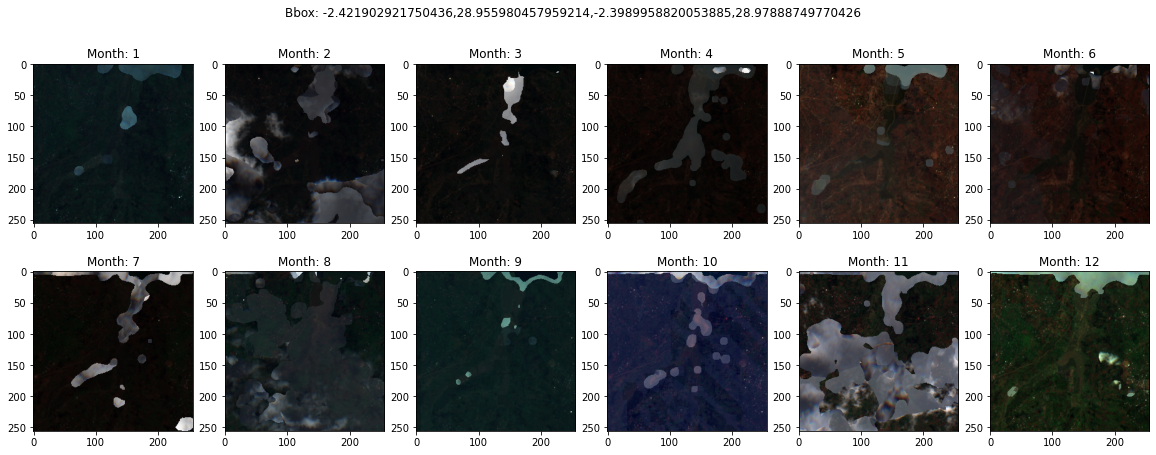

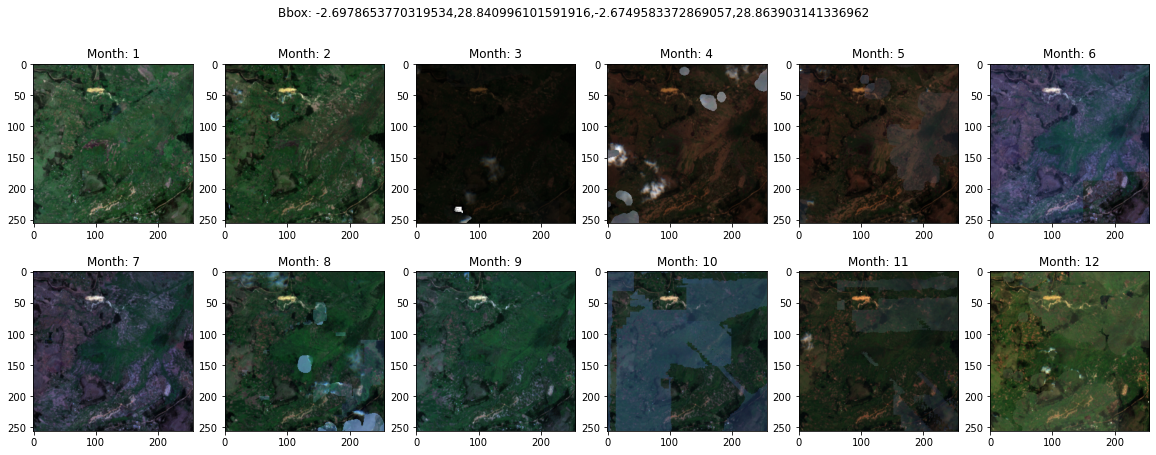

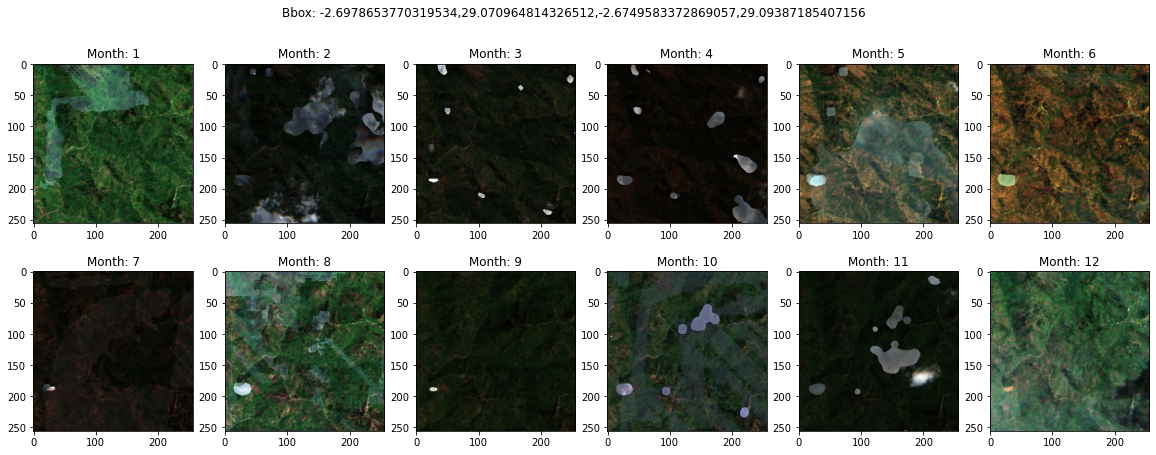

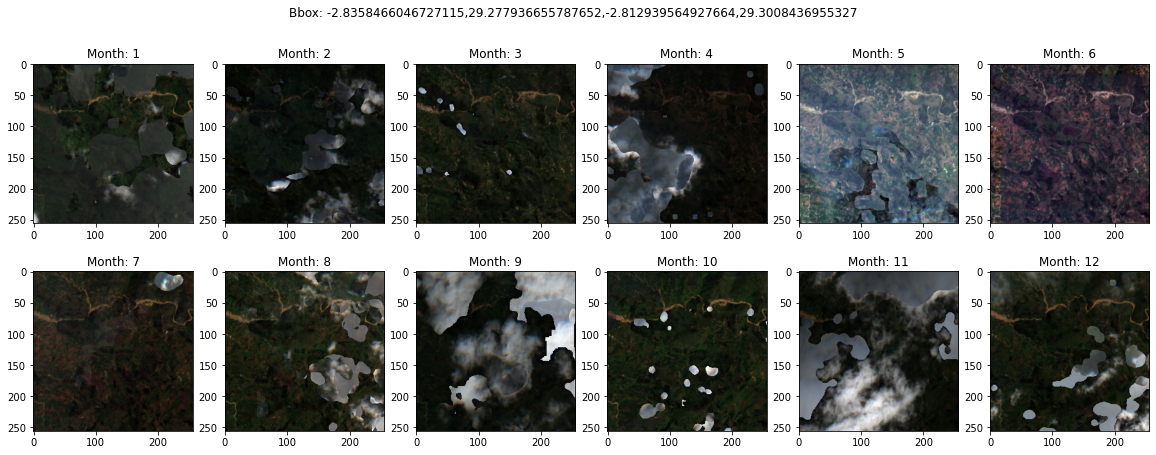

In [15]:
for d in data:
    d.plot()